# **NOISE REMOVAL FOR IMAGE PROCESSING**

## WHAT IS IMAGE PROCESSING ?
Image processing is a method to perform some operations on an image, in order to get an enhanced image or to extract some useful information from it. It is a type of signal processing in which input is an image and output may be image or characteristics/features associated with that image.

<p align="center">
  <img width="450" height="200" src="https://assets.skyfilabs.com/images/blog/latest-image-processing-mini-projects.webp">
</p>

## WHY IS IT IMPORTANT ?
* Importance and necessity of digital image processing stems from two principal application areas: 
  * First being the Improvement of pictorial information for human interpretation. 
  *  Second being the Processing of a scene data for an autonomous machine perception.
* Digital image processing has a broad range of applications such as remote sensing, image and data storage for transmission in business applications, medical imaging, acoustic imaging, Forensic sciences and industrial automation. 
*Images acquired by satellites are useful in tracking of earth resources, geographical mapping, and prediction of agricultural crops, urban population, weather forecasting, flood and fire control. 
*Space imaging applications include recognition and analyzation of objects contained in images obtained from deep space-probe missions. There are also medical applications such as processing of X-Rays, Ultrasonic scanning, Electron micrographs, Magnetic Resonance Imaging etc.




### **Denoising Using cv2.fastNlMeansDenoising()**
Steps-


1.   Import the required libraries
2.   Load the image.
3.   Denoise the third frame considering all the 5 frames.
4.   Set the plot size as required.
5.   Show the subplot. 



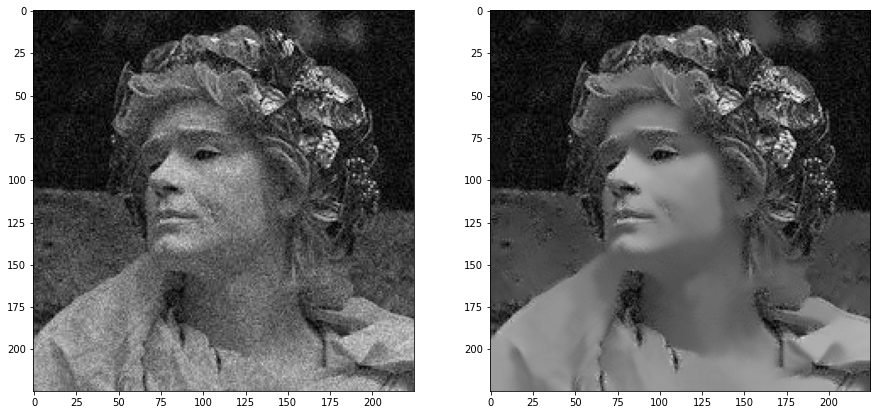

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('test_image.jpg')

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.figure(figsize=(15, 10))
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

### **Denoising Using cv2.fastNlMeansDenoisingMulti()**
We can also apply the same denoising method to a video.

The first argument is the list of noisy frames. Second argument imgToDenoiseIndex specifies which frame we need to denoise, for that we pass the index of frame in our input list. Third is the temporalWindowSize which specifies the number of nearby frames to be used for denoising. It should be odd. In that case, a total of temporalWindowSize frames are used where central frame is the frame to be denoised. For example, you passed a list of 5 frames as input. Let imgToDenoiseIndex = 2 and temporalWindowSize = 3. Then frame-1, frame-2 and frame-3 are used to denoise frame-2.

**CODING:**


1.   Create a list of first 5 frames.
2.   Convert all to float64.
3.   Create a noise of a specific variance.
4.   Add noise to the images.
5.   Denoise 3rd frame considering all the 5 frames.



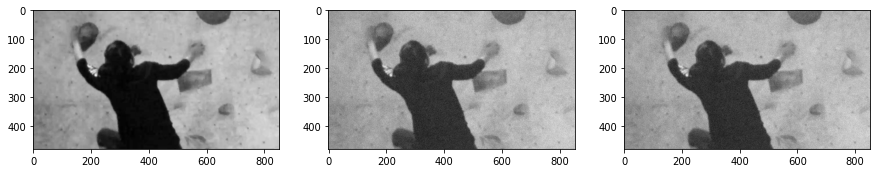

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('test_video.mp4')

# create a list of first 5 frames
img = [cap.read()[1] for i in range(5)]

# convert all to grayscale
gray = [cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in img]

# convert all to float64
gray = [np.float64(i) for i in gray]

# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10

# Add this noise to images
noisy = [i+noise for i in gray]

# Convert back to uint8
noisy = [np.uint8(np.clip(i,0,255)) for i in noisy]

# Denoise 3rd frame considering all the 5 frames
dst = cv2.fastNlMeansDenoisingMulti(noisy, 2, 5, None, 4, 7, 35)
plt.figure(figsize=(15, 10))
plt.subplot(131),plt.imshow(gray[2],'gray')
plt.subplot(132),plt.imshow(noisy[2],'gray')
plt.subplot(133),plt.imshow(dst,'gray')
plt.show()